In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv("fashion-mnist_train.csv")
df_test=pd.read_csv("fashion-mnist_test.csv")

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
label_counts=df_train['label'].value_counts()

([<matplotlib.patches.Wedge at 0x2b31d10eca0>,
 [Text(1.0461621663333946, 0.3399186987098808, '2'),
  Text(0.6465637650236903, 0.8899187028927925, '9'),
  Text(-2.5747358111484753e-08, 1.0999999999999999, '6'),
  Text(-0.6465638066837905, 0.8899186726249574, '0'),
  Text(-1.0461621822461362, 0.3399186497354952, '3'),
  Text(-1.0461621504206509, -0.33991874768426583, '4'),
  Text(-0.6465637233635886, -0.8899187331606258, '5'),
  Text(7.724207457870327e-08, -1.0999999999999974, '8'),
  Text(0.6465638483438898, -0.88991864235712, '7'),
  Text(1.0461621981588753, -0.33991860076110864, '1')])

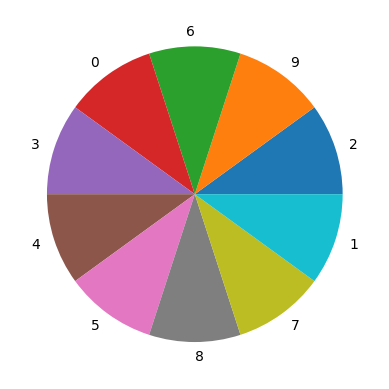

In [12]:
import matplotlib.pyplot as plt
plt.pie(label_counts, labels=label_counts.index)

In [13]:
y_train=df_train['label']
X_train=df_train.drop('label', axis=1)
y_test=df_test['label']
X_test=df_test.drop('label', axis=1)

In [5]:
X_train, y_train, X_test, y_test=np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

In [6]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

In [8]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

model=Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [10]:
model.compile(optimizer='adam', loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 0.5493 - accuracy: 0.8115
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4076 - accuracy: 0.8556
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3696 - accuracy: 0.8680
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3489 - accuracy: 0.8753
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3303 - accuracy: 0.8806
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3096 - accuracy: 0.8888
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2965 - accuracy: 0.8926
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2855 - accuracy: 0.8962
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2762 - accuracy: 0.8992
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2681 - accuracy: 0.9022

In [11]:
loss, acc=model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3167 - accuracy: 0.8862


In [12]:
loss, acc

(0.3167157471179962, 0.8862000107765198)

In [13]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_true_labels, y_pred_labels))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.80      0.82      1000
           3       0.90      0.92      0.91      1000
           4       0.82      0.86      0.84      1000
           5       0.95      0.95      0.95      1000
           6       0.74      0.70      0.72      1000
           7       0.96      0.84      0.90      1000
           8       0.97      0.97      0.97      1000
           9       0.87      0.98      0.92      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



1/1 [==============================] - 0s 51ms/step
t_shirt


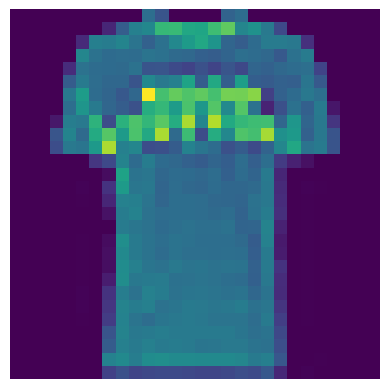

In [17]:
import matplotlib.pyplot as plt
def predict(id):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(X_test[id:id+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(X_test[id])
    plt.axis("off")
    plt.show()
predict(9)